In [1]:
%pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 16.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#Download Database
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your Key Goes Here")
project = rf.workspace("surfer-71pgd").project("wood3-nchju")
version = project.version(1)
dataset = version.download("yolov5")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wood3-1 in yolov5pytorch:: 100%|██████████| 2991/2991 [00:00<00:00, 5328.55it/s]


In [ ]:
# Load or Download the YOLOv5
#If the model is not downloaded use the following snippet
model = YOLO("yolov5s.pt")

#If the model is downloaded specify your model path in the following code snippet
#model=YOLO("./Your/Model/Path.pt")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 148MB/s]


In [ ]:
# This code block is to resolve some path definition issues on Kaggle. On your personal computer or custom dataset this wont ne needed.  
import yaml

# Load the existing YAML file
yaml_path = '/kaggle/working/wood3-1/data.yaml'
with open(yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

# Update paths to training and validation images
data_config['train'] = '/kaggle/working/wood3-1/train/images'
data_config['val'] = '/kaggle/working/wood3-1/valid/images'

# Save the modified YAML file
with open(yaml_path, 'w') as file:
    yaml.safe_dump(data_config, file)

print(f"Updated {yaml_path} successfully.")

Updated /kaggle/working/wood3-1/data.yaml successfully.


In [11]:
# Train the model
train_results = model.train(
    data="/kaggle/working/wood3-1/data.yaml",  # path to dataset YAML
    epochs=25,  # number of training epochs
    imgsz=640,  # training image size
    device="0",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/kaggle/working/wood3-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]
2024-11-22 13:52:42,000	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-22 13:52:42,879	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/wood3-1/train/labels... 1361 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1361/1361 [00:02<00:00, 508.41it/s]

train: WARNING ⚠️ /kaggle/working/wood3-1/train/images/images-22-_jpeg_jpg.rf.4977728e58867bde27a6b26acfb44576.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/wood3-1/train/images/images-22-_jpeg_jpg.rf.6c611963d3fb76a5be6e683f7d7c73a1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/wood3-1/train/images/images-22-_jpeg_jpg.rf.8be896cd5f301a6b2c7ee80a74841cc9.jpg: 1 duplicate labels removed


train: New cache created: /kaggle/working/wood3-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/wood3-1/valid/labels... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 192.59it/s]


val: New cache created: /kaggle/working/wood3-1/valid/labels.cache
Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      9.34G      1.433      1.295      1.188        142        640: 100%|██████████| 86/86 [01:28<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        130       9258      0.713      0.668      0.715       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.35G      1.217     0.8557      1.057         84        640: 100%|██████████| 86/86 [01:27<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.10it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      12.6G       1.21      0.828      1.056         86        640: 100%|██████████| 86/86 [01:24<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        130       9258      0.735      0.725      0.739      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.74G      1.185     0.8314      1.043         15        640: 100%|██████████| 86/86 [01:26<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


                   all        130       9258       0.79       0.77      0.815      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      12.4G      1.144     0.7631      1.023         59        640: 100%|██████████| 86/86 [01:25<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        130       9258       0.81      0.773      0.828       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.43G      1.112     0.7296      1.006        182        640: 100%|██████████| 86/86 [01:27<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        130       9258      0.811      0.794      0.844      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      9.76G      1.083     0.7002      1.001         32        640: 100%|██████████| 86/86 [01:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


                   all        130       9258      0.843      0.795      0.852      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.06G      1.076     0.6756     0.9929         73        640: 100%|██████████| 86/86 [01:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        130       9258      0.843      0.853      0.888      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      12.1G      1.044     0.6537     0.9853        179        640: 100%|██████████| 86/86 [01:26<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


                   all        130       9258      0.834      0.804      0.862      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.65G      1.034     0.6423     0.9773        115        640: 100%|██████████| 86/86 [01:25<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


                   all        130       9258      0.851      0.847      0.892      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.71G      1.025     0.6221     0.9666        105        640: 100%|██████████| 86/86 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


                   all        130       9258      0.874      0.821      0.897      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.74G      1.021     0.6134     0.9648         62        640: 100%|██████████| 86/86 [01:25<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        130       9258      0.875      0.835      0.896       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      10.4G     0.9887     0.6056     0.9588         69        640: 100%|██████████| 86/86 [01:27<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        130       9258      0.872      0.868      0.911      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      9.75G      0.981     0.5827     0.9547         71        640: 100%|██████████| 86/86 [01:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        130       9258      0.866      0.862      0.906      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      10.3G     0.9658     0.5666     0.9469        346        640: 100%|██████████| 86/86 [01:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        130       9258      0.868      0.881      0.915      0.669


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      10.5G     0.9734     0.6459     0.9656          3        640: 100%|██████████| 86/86 [00:51<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        130       9258      0.876      0.858       0.91      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.91G     0.9756     0.5795      0.965         56        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        130       9258      0.863      0.848      0.887       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      8.47G     0.9549     0.5621     0.9546         23        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        130       9258      0.862      0.857      0.905      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      8.06G     0.9698     0.6846     0.9752          4        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        130       9258      0.892      0.872      0.923      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.67G     0.9379     0.5362     0.9486         25        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        130       9258       0.89      0.876      0.922      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.99G      0.919     0.5174     0.9401         85        640: 100%|██████████| 86/86 [00:46<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        130       9258      0.889      0.871      0.917      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.85G     0.9157     0.5183     0.9514         24        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        130       9258      0.893      0.874      0.922      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      8.28G      0.886     0.4962      0.928         13        640: 100%|██████████| 86/86 [00:46<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        130       9258      0.892      0.884      0.927        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.43G     0.8885     0.4958     0.9335         16        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        130       9258      0.896       0.88       0.93      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      10.2G     0.8741     0.5206       0.93         12        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]

                   all        130       9258      0.901      0.883       0.93      0.705



25 epochs completed in 0.527 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 18.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


                   all        130       9258      0.901      0.883       0.93      0.705
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train5


In [12]:
# Evaluate model performance on the validation set
metrics = model.val()

Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


val: Scanning /kaggle/working/wood3-1/valid/labels.cache... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


                   all        130       9258      0.901      0.884       0.93      0.706
Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train52



image 1/1 /kaggle/working/wood3-1/train/images/002_jpg.rf.e293ff7ed70790ea8d60f47e4613257e.jpg: 640x640 170 woods, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


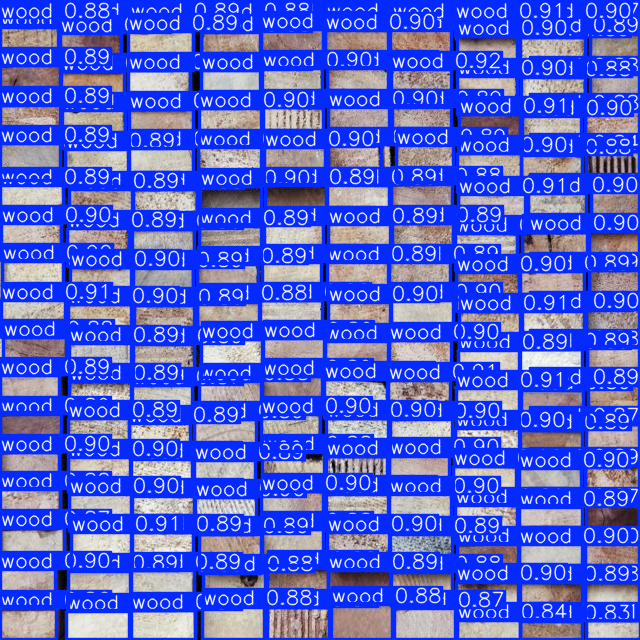

Number of wood instances detected: 170


In [14]:
results = model("/kaggle/working/wood3-1/train/images/002_jpg.rf.e293ff7ed70790ea8d60f47e4613257e.jpg")
results[0].show()
wood_count = len(results[0].boxes)  # Each bounding box represents one detection
print(f"Number of wood instances detected: {wood_count}")